In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
# System Modules

import matplotlib.pyplot as plt
import skvideo.io

# Deep Learning Modules
from torch.utils.data import Dataset

# User Defined Modules
import specs
from data.Img_dataset import *
from data.Video_dataset import Video_dataset
from models import UNet

from serde import *

from Prediction import Prediction
from Training import Mode
#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
params = open_experiment('UNet_SGD')


In [5]:
cfg_path=params['cfg_path']
predicter=Prediction(cfg_path)

In [6]:
predicter.setup_model(model=UNet.UNet)

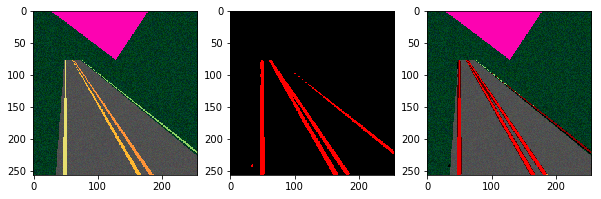

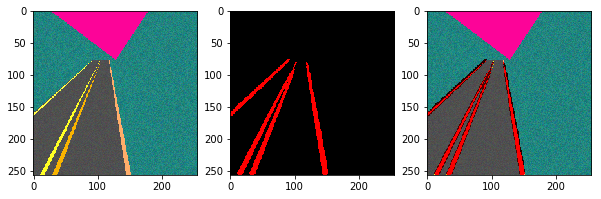

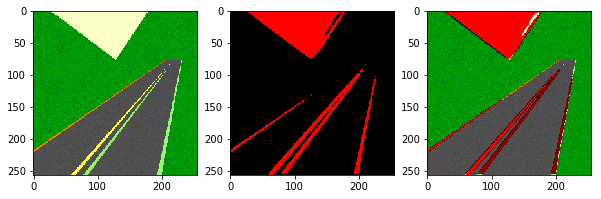

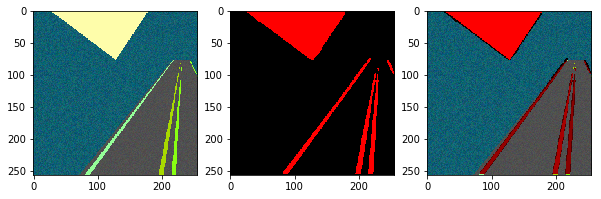

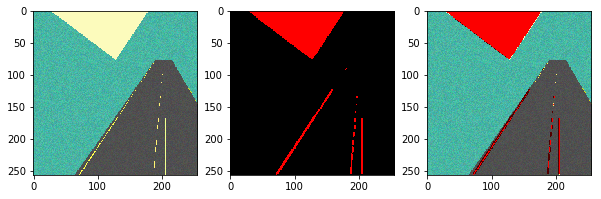

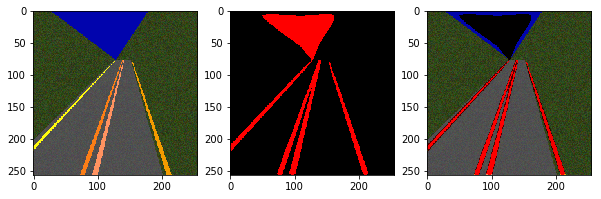

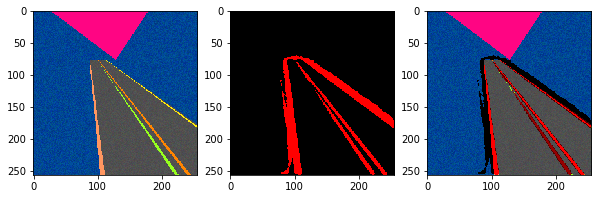

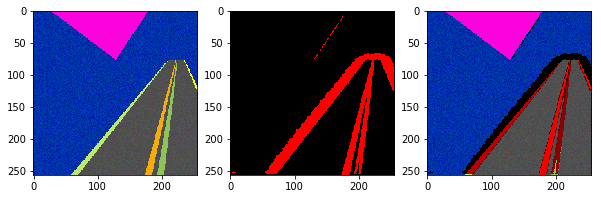

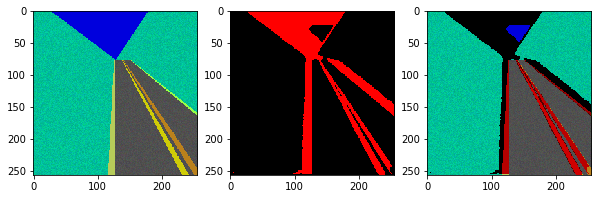

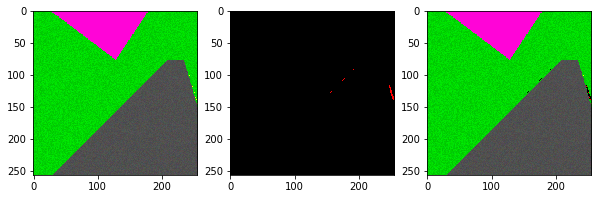

In [7]:
# Generate test set from simulation and run model

predict_dataset = Img_dataset(mode=Mode.PREDICT,dataset_name='TestSet10', size=10, seed=234L,cfg_path=cfg_path)
predict_loader = torch.utils.data.DataLoader(dataset=predict_dataset,
                                                 batch_size=1,
                                
                                             shuffle=False, num_workers=2)


predicter.predict(predict_loader)

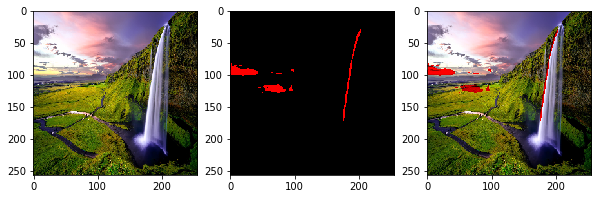

In [8]:
# Generate test set from simulation and run model
predict_dataset = Img_dataset(mode=Mode.PREDICT,dataset_name='True_Negative_Dataset_Test', size=1, seed=234L,cfg_path=cfg_path)

predict_loader = torch.utils.data.DataLoader(dataset=predict_dataset,
                                                 batch_size=1,
                                                 shuffle=False, num_workers=2)
predicter.predict(predict_loader)

The number of images is less


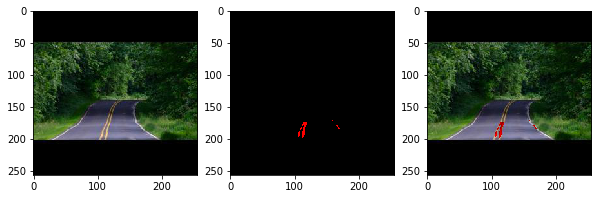

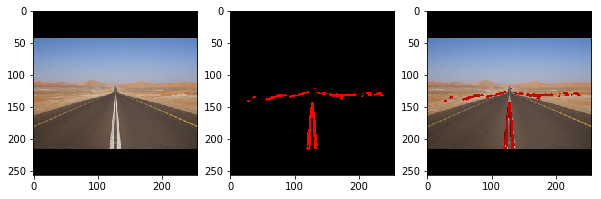

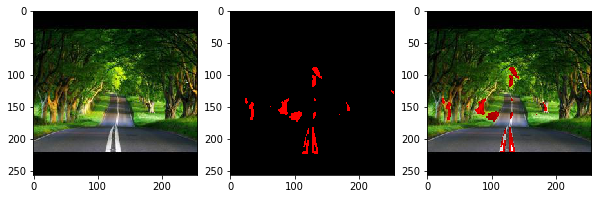

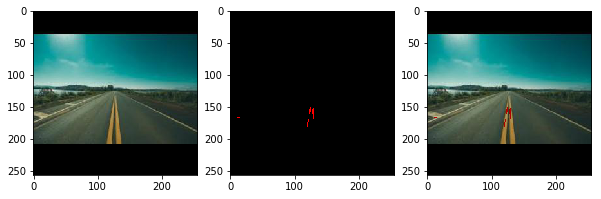

In [ ]:
#Generate test set from real images and run model

predict_dataset_real=Img_dataset(mode=Mode.PREDICT,dataset_name='Real_Road_Test', size=10, seed=234L,cfg_path=cfg_path)

predict_loader_real = torch.utils.data.DataLoader(dataset=predict_dataset_real,
                                               batch_size=2,
                                               shuffle=False,num_workers=2)


predicter.predict(predict_loader_real)

In [ ]:
cfg_path=params['cfg_path']
video_predict_dataset=Video_dataset(folder_name='Video')
#video_predict_dataset=VideoDataset()
video_loader=torch.utils.data.DataLoader(dataset=video_predict_dataset,
                                               batch_size=8,
                                               shuffle=False)

predicter.predict(video_loader,visualize=False,save_video=True)